In [6]:
#install.packages("readr")
#install.packages("plyr")
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
# Load packages
library(readr)
library(plyr)
library(dplyr)
library(ggplot2)
library(corrplot)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [2]:
# Set working directory
setwd("/Users/asamra/dev/R_Project")

In [3]:
# Import CSV
nyc_crime <- read_csv("/Users/asamra/dev/R_Project/NYPD_Arrests_Data__Historic_.csv")

Parsed with column specification:
cols(
  ARREST_KEY = col_double(),
  ARREST_DATE = col_character(),
  PD_CD = col_double(),
  PD_DESC = col_character(),
  KY_CD = col_double(),
  OFNS_DESC = col_character(),
  LAW_CODE = col_character(),
  LAW_CAT_CD = col_character(),
  ARREST_BORO = col_character(),
  ARREST_PRECINCT = col_double(),
  JURISDICTION_CODE = col_double(),
  AGE_GROUP = col_character(),
  PERP_SEX = col_character(),
  PERP_RACE = col_character(),
  X_COORD_CD = col_double(),
  Y_COORD_CD = col_double(),
  Latitude = col_double(),
  Longitude = col_double()
)


In [4]:
# View first 10 records
head(nyc_crime)

ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
173130602,12/31/2017,566,"MARIJUANA, POSSESSION",678,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0,25-44,M,BLACK,1063056,207463,40.73577,-73.71564
173114463,12/31/2017,478,"THEFT OF SERVICES, UNCLASSIFIED",343,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113,219613,40.76944,-73.91024
173113513,12/31/2017,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677,OTHER STATE LAWS,LOC000000V,V,K,73,1,18-24,M,BLACK,1010719,186857,40.67952,-73.90457
173113423,12/31/2017,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831,217446,40.76352,-73.98707
173113421,12/31/2017,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073,216078,40.75977,-73.98981
173130583,12/31/2017,397,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105,ROBBERY,PL 1601001,F,K,73,0,18-24,M,BLACK,1007524,188555,40.68419,-73.91608


In [5]:
# View statistical summary
summary(nyc_crime)

   ARREST_KEY        ARREST_DATE            PD_CD         PD_DESC         
 Min.   :  9926901   Length:4798339     Min.   :  0.0   Length:4798339    
 1st Qu.: 55869512   Class :character   1st Qu.:339.0   Class :character  
 Median : 81904394   Mode  :character   Median :511.0   Mode  :character  
 Mean   : 91179319                      Mean   :514.5                     
 3rd Qu.:140120958                      3rd Qu.:750.0                     
 Max.   :191719213                      Max.   :997.0                     
                                        NA's   :220                       
     KY_CD        OFNS_DESC           LAW_CODE          LAW_CAT_CD       
 Min.   :101.0   Length:4798339     Length:4798339     Length:4798339    
 1st Qu.:126.0   Class :character   Class :character   Class :character  
 Median :341.0   Mode  :character   Mode  :character   Mode  :character  
 Mean   :303.4                                                           
 3rd Qu.:351.0                

In [6]:
# Change ARREST_DATE in nyc_crime2 from character to date
nyc_crime2$ARREST_DATE <- as.Date(nyc_crime2$ARREST_DATE, format = "%m/%d/%Y")

In [7]:
# Order ARREST_DATE by ascending
nyc_crime2 <- nyc_crime2[order(nyc_crime2$ARREST_DATE),]

In [9]:
# Order ARREST_DATE by descending
nyc_crime2 <- nyc_crime2[rev(order(nyc_crime2$ARREST_DATE)),]

In [10]:
# Create new columns for Year Month Day
nyc_crime2$ARREST_YEAR <- format(as.Date(nyc_crime2$ARREST_DATE, format = "%m/%d/%Y"),"%Y")
nyc_crime2$ARREST_MONTH <- format(as.Date(nyc_crime2$ARREST_DATE, format = "%m/%d/%Y"),"%m")
nyc_crime2$ARREST_DAY <- format(as.Date(nyc_crime2$ARREST_DATE, format = "%m/%d/%Y"),"%d")

In [11]:
# Count all rows
count(nyc_crime2)

n
<int>
4773530


In [12]:
# Count rows based on condition
# Shows count of all arrests in 2006
length(which(nyc_crime2$ARREST_YEAR == "2006"))

[1] 370773

In [13]:
# Count / Group rows by year and count using plyr
count(nyc_crime2, ARREST_YEAR)
count(nyc_crime2, ARREST_MONTH)
count(nyc_crime2, ARREST_DAY)

ARREST_YEAR,n
<chr>,<int>
2006,370773
2007,402122
2008,400272
2009,419816
2010,420555
2011,410938
2012,393946
2013,391586
2014,385875


ARREST_MONTH,n
<chr>,<int>
01,417373
02,389018
03,434559
04,413003
05,423864
06,396731
07,399190
08,410555
09,383973


ARREST_DAY,n
<chr>,<int>
01,157429
02,158822
03,160161
04,157420
05,161512
06,163042
07,161301
08,162464
09,162477


In [14]:
# Filter using dplyr and create new df
df_2006_dplyr <- filter(nyc_crime2, (ARREST_YEAR == 2006))

In [15]:
# Filter all rows by multiple conditions using dplyr
df_2006_drugs <- filter(nyc_crime2, (ARREST_YEAR == 2006 & KY_CD == 235))

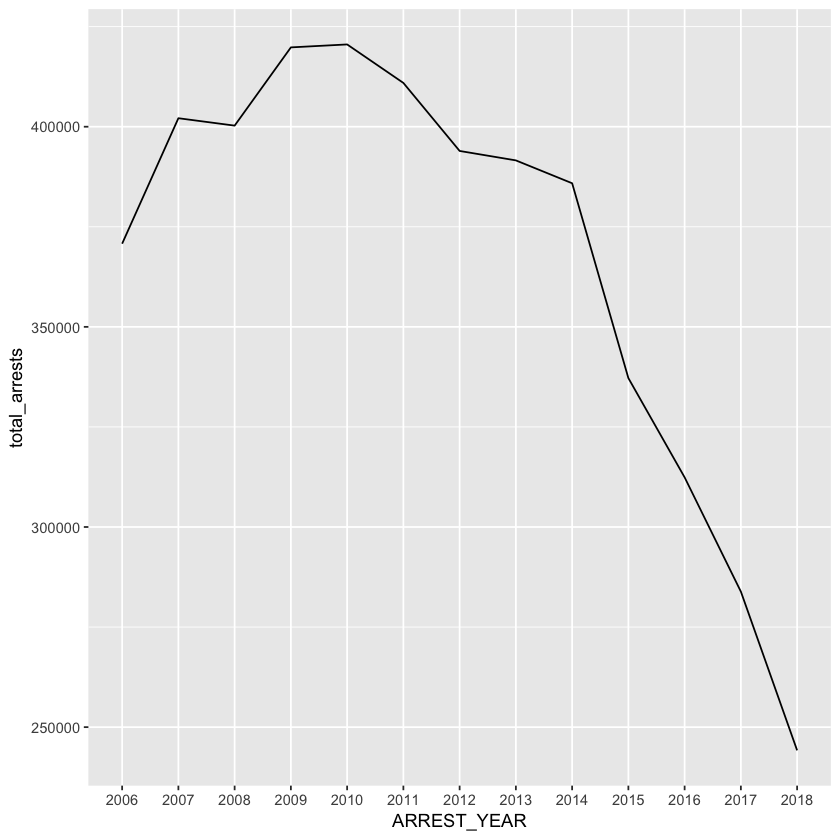

In [16]:
nyc_crime2 %>% 
  group_by(ARREST_YEAR) %>% 
  summarize(total_arrests = n()) %>% 
  ggplot( aes ( x = ARREST_YEAR, y = total_arrests, group = 1 ) ) + geom_line()

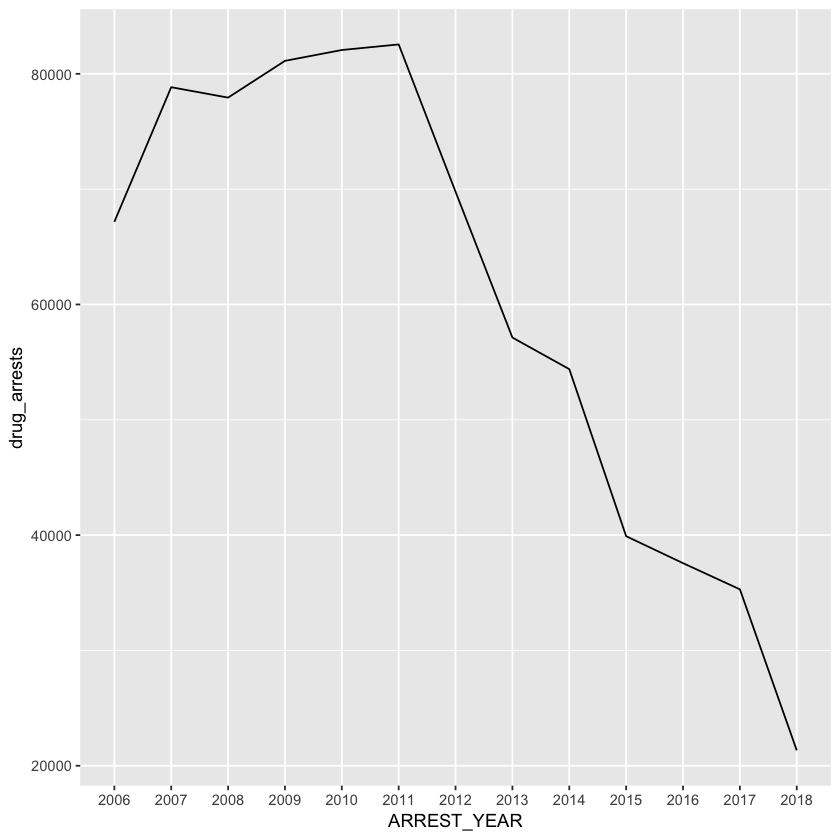

In [17]:
# Plot total drug arrests for all years
nyc_crime2 %>% 
  filter(KY_CD == 235) %>% 
  group_by(ARREST_YEAR) %>% 
  summarize(drug_arrests = n()) %>% 
  ggplot( aes ( x = ARREST_YEAR, y = drug_arrests, group = 1 ) ) + geom_line()

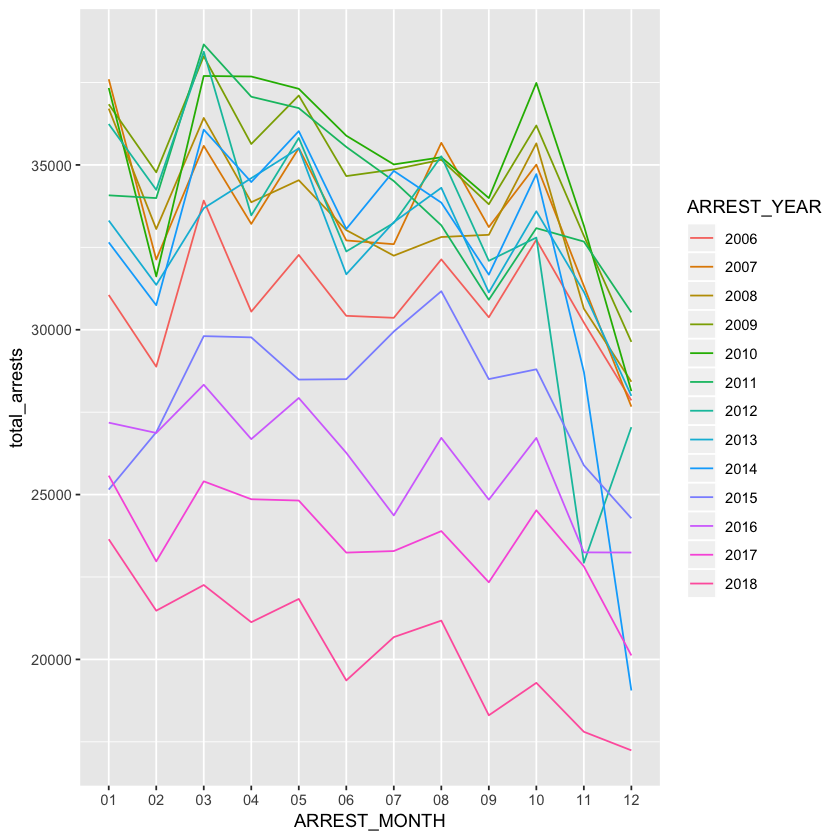

In [18]:
# Plot total arrests with line for each year
nyc_crime2 %>% 
  group_by(ARREST_YEAR, ARREST_MONTH) %>% 
  summarize(total_arrests = n()) %>% 
  ggplot( aes ( x = ARREST_MONTH, y = total_arrests, group = ARREST_YEAR, color = ARREST_YEAR) ) + geom_line()

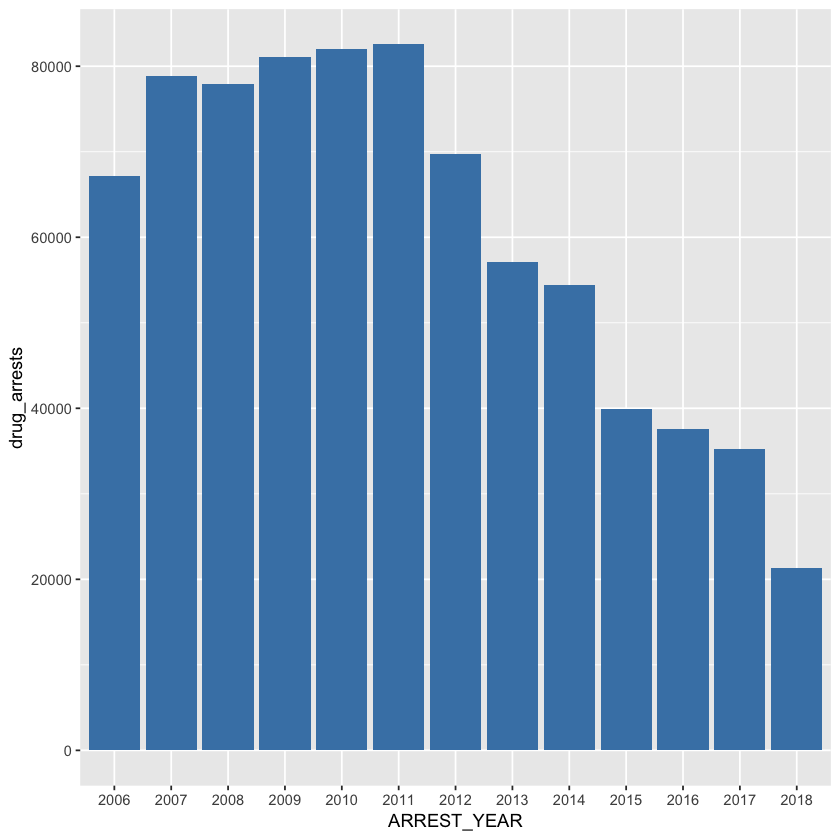

In [19]:
# Plot total drug arrests by year bar
nyc_crime2 %>% 
  filter(KY_CD == 235) %>% 
  group_by(ARREST_YEAR) %>% 
  summarize(drug_arrests = n()) %>% 
  ggplot( aes ( x = ARREST_YEAR, y = drug_arrests, group = ARREST_YEAR) ) + 
  geom_bar(stat = 'identity', fill = 'steelblue')

In [20]:
# Top 10 crimes by name
crimes_by_OFNS_DESC <- nyc_crime2 %>%
  #filter(ARREST_YEAR == 2018) %>% 
  group_by(OFNS_DESC) %>% 
  summarize(total_arrests = n())
# order top 10 crimes desc
top10_name <- top_n(crimes_by_OFNS_DESC, 10, total_arrests) %>% arrange(desc(total_arrests))

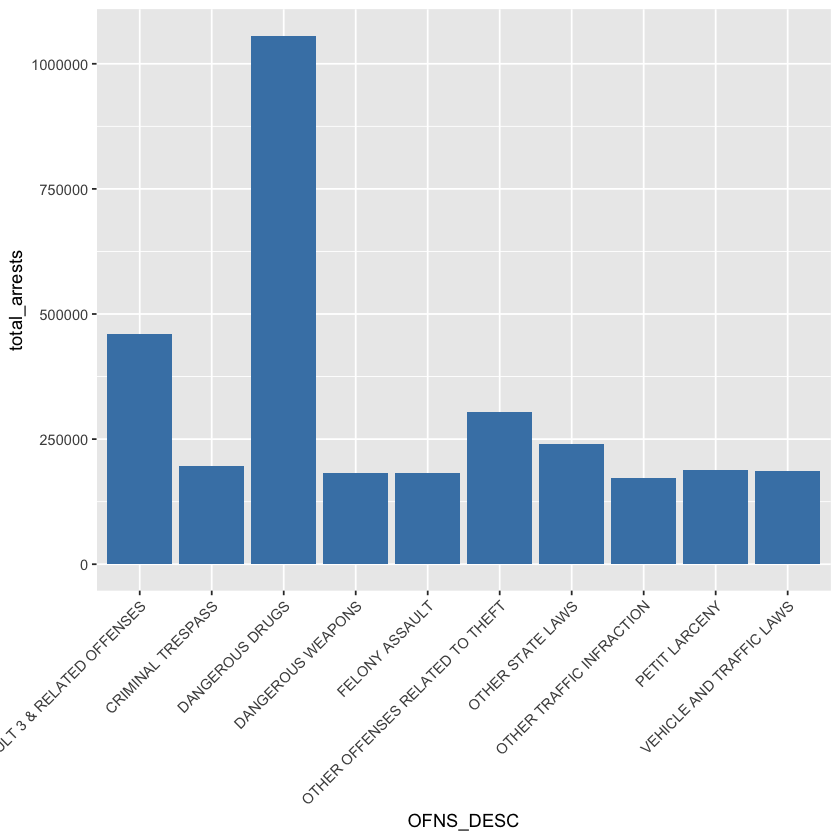

In [21]:
# Plot total arrrests of top crimes
top10_name %>% 
  group_by(OFNS_DESC) %>% 
  #summarize(total_arrests = n()) %>% 
  ggplot( aes ( x = OFNS_DESC, y = total_arrests, group = 1) ) + 
  geom_bar(stat = 'identity', fill = 'steelblue') +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

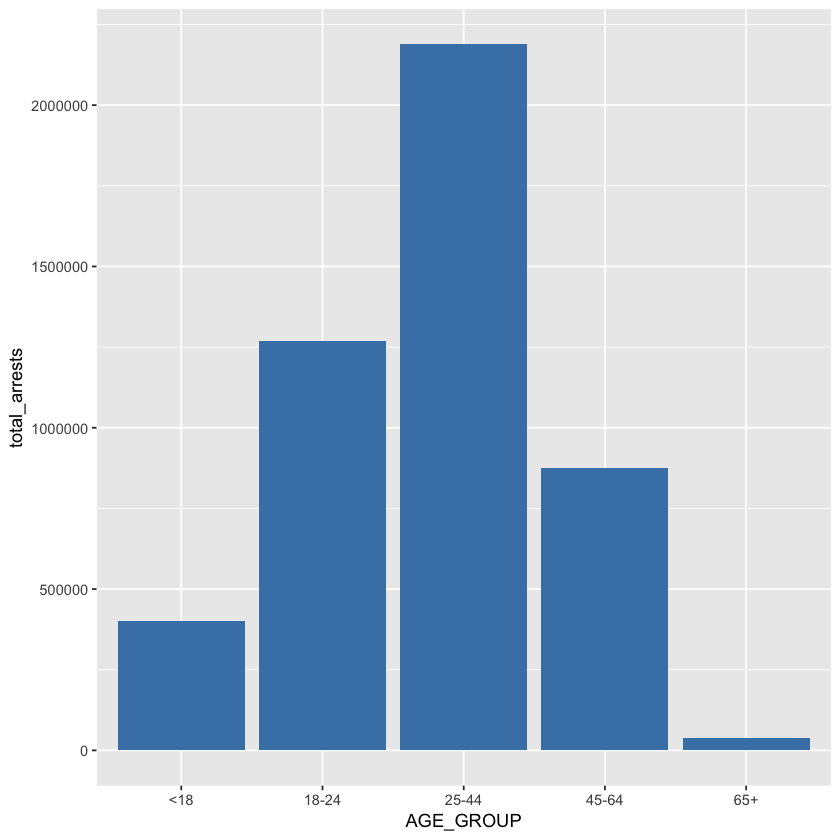

In [22]:
# Plot by filtering by age groups
nyc_crime2 %>% 
  filter(AGE_GROUP %in% c("25-44","65+","45-64","18-24","<18")) %>%
  group_by(AGE_GROUP) %>% 
  summarize(total_arrests = n()) %>% 
  ggplot( aes ( x = AGE_GROUP, y = total_arrests) ) + 
  geom_bar(stat = 'identity', fill = 'steelblue')

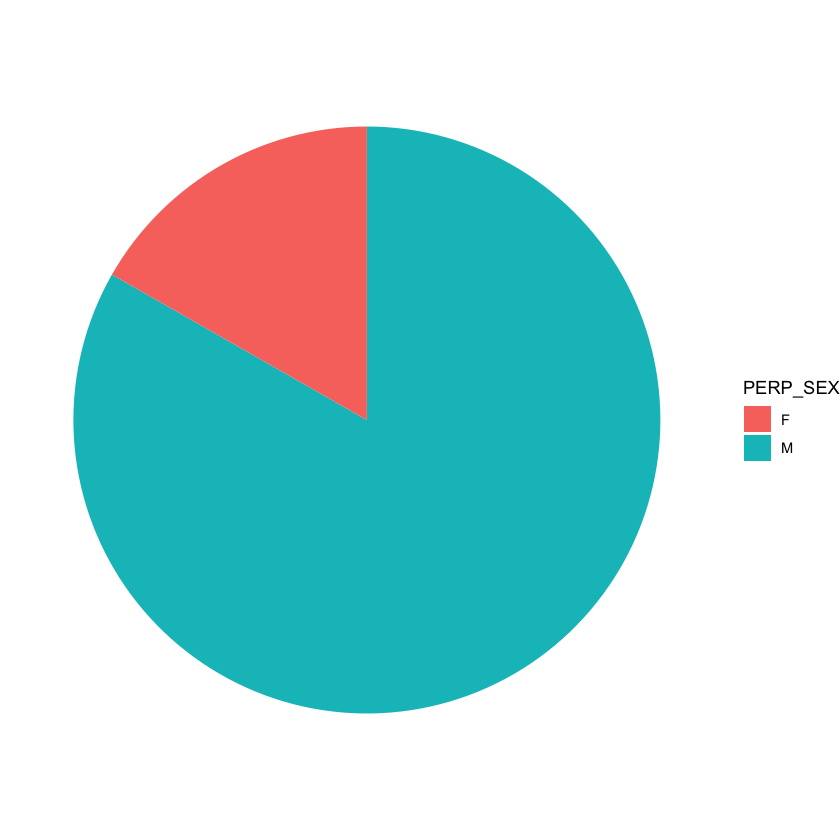

In [23]:
# Pie plot arrests by gender
nyc_crime2 %>% 
  group_by(PERP_SEX) %>%
  summarize(total_arrests = n()) %>%
  ggplot(aes(x = "", y = total_arrests, fill=PERP_SEX)) +  
  geom_bar(stat = 'identity', width=1) +
  coord_polar('y', start=0) +
  theme_void()